In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with= engine)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
Base

sqlalchemy.ext.automap.Base

In [9]:
#checking the columns and types in measurement
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_year = dt.datetime(2017, 8, 23)
last_year = last_year - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

results = session.query(measurement.date, measurement.prcp).\
                filter(measurement.date >= last_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(results, columns=["date", "precipitation"]).\
            set_index("date").sort_values(by="date")

# Sort the dataframe by date
prcp_df.head(15)

,precipitation
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
2016-08-24,1.22
2016-08-25,0.08
2016-08-25,0.00


<Axes: xlabel='date'>

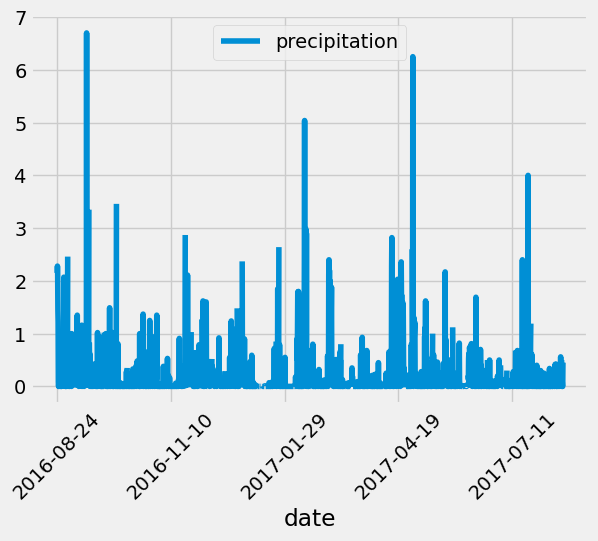

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(rot=45)


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df["precipitation"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [14]:
# checking columns and types in station
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c["name"], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [16]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

sel = [measurement.station, func.count(measurement.station)]
station_counts = session.query(*sel).group_by(measurement.station).\
            order_by(func.count(measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
active_station = session.query(*sel).\
                    filter(measurement.station == station_counts[0][0]).all()
active_station

[(54.0, 85.0, 71.66378066378067)]

In [22]:
plot = session.query(measurement.tobs).\
        filter(measurement.date>=last_year, measurement.station == station_counts[0][0]).all()
plot = pd.DataFrame(plot)

<Axes: ylabel='Frequency'>

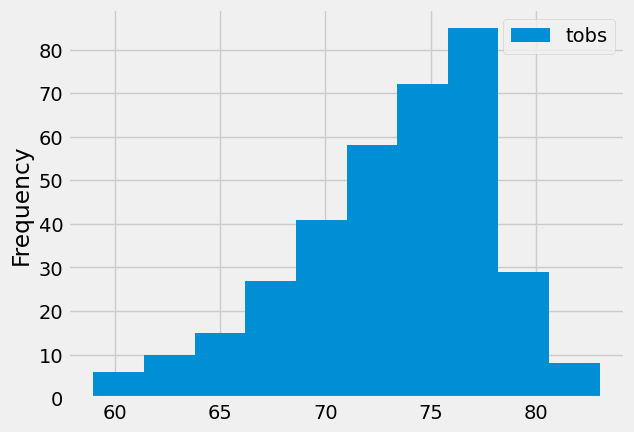

In [25]:
# Using the most active station id
# Query the last 12 months of temperaabsture observation data for this station and plot the results as a histogram
plot.plot(kind="hist")

# Close Session

In [26]:
# Close Session
session.close()